<a href="https://colab.research.google.com/github/Anton-Spivak/Exploratory-Data-Analysis/blob/main/Fantasy_Sports_Clustering_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fantasy Sports Clustering Analysis**

--------------------------------
## **Context** 
-------------------------------

Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


----------------------------
## **Objective**
-----------------------------

OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

--------------------------
## **Data Description**
--------------------------

- **Player_Name:** Name of the player.
- **Club:** Club in which the player plays.
- **Position:** Position in which the player plays.
- **Goals_Scored:** Number of goals scored by the player in the previous season.
- **Assists:** Number of passes made by the player leading to goals in the previous season.
- **Total_Points:** Total number of fantasy points scored by the player in the previous season.
- **Minutes:** Number of minutes played by the player in the previous season.
- **Goals_Conceded:** Number of goals conceded by the player in the previous season.
- **Creativity:** A score, computed using a range of stats, that assesses player performance in terms of producing goalscoring opportunities for other players.
- **Influence:** A score, computed using a range of stats, that evaluates a player's impact on a match, taking into account actions that could directly or indirectly affect the match outcome.
- **Threat:** A score, computed using a range of stats, that gauges players who are most likely to score goals.
- **Bonus:** Total bonus points received. The three best performing players in each match receive additional bonus points based on a score computed using a range of stats. 3 points are awarded to the highest scoring player, 2 to the second best, and 1 to the third.
- **Clean_Sheets:** Number of matches without conceding a goal in the previous season.

## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Installing the sklearn_extra
!pip install scikit-learn-extra 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

sns.set_theme(style='darkgrid')

# Removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Seting the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# To compute distances
from scipy.spatial.distance import cdist, pdist

# To perform K-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# To import K-Medoids
from sklearn_extra.cluster import KMedoids

# To import DBSCAN and Gaussian Mixture
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

# To perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster

# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing the data
data=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR3ABWYbIdK0Jd4Gu_QqyPMC_xCF_knBZoSGPebgdFsykBcNV6QPTRhGwqMT6vwRuUaBKfjClkUlXJG/pub?output=csv')
data

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10
473,Vitor Ferreira,Wolverhampton Wanderers,Midfielder,0,1,26,509,8,179.0,80.0,72,0,0
474,Willian Jose,Wolverhampton Wanderers,Forward,1,1,40,1106,13,165.9,89.6,256,3,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Player_Name     476 non-null    object 
 1   Club            476 non-null    object 
 2   Position        476 non-null    object 
 3   Goals_Scored    476 non-null    int64  
 4   Assists         476 non-null    int64  
 5   Total_Points    476 non-null    int64  
 6   Minutes         476 non-null    int64  
 7   Goals_Conceded  476 non-null    int64  
 8   Creativity      476 non-null    float64
 9   Influence       476 non-null    float64
 10  Threat          476 non-null    int64  
 11  Bonus           476 non-null    int64  
 12  Clean_Sheets    476 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 48.5+ KB


**Observations and Insights**

We see that: 
- There is 476 of non-null values in each column, so our dataset has no missing values.
- Most of the datatypes are numerical, and only 3 of them are objects

In [ ]:
# Let's take a view at a sample of the data
data.sample(n = 10, random_state = 1)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
441,Mark Noble,West Ham United,Midfielder,0,0,27,701,15,88.6,80.4,7,0,0
363,Sean Longstaff,Newcastle United,Midfielder,0,1,41,1405,26,182.8,179.2,148,1,2
31,Anwar El Ghazi,Aston Villa,Midfielder,10,0,111,1604,22,426.1,500.4,726,13,5
132,Olivier Giroud,Chelsea,Forward,4,0,47,740,5,112.0,161.4,403,6,4
90,Chris Wood,Burnley,Forward,12,3,138,2741,43,323.2,595.8,1129,16,9
249,Vontae Daley-Campbell,Leicester City,Defender,0,0,0,0,0,0.0,0.0,0,0,0
65,Danny Welbeck,Brighton and Hove Albion,Forward,6,4,89,1541,18,269.7,319.8,595,15,6
445,Ryan Fredericks,West Ham United,Defender,1,1,28,564,9,166.8,155.2,96,0,1
117,Christian Pulisic,Chelsea,Midfielder,4,3,82,1731,21,378.8,361.4,724,3,7
415,Ryan Sessegnon,Tottenham Hotspurs,Defender,0,0,0,0,0,0.0,0.0,0,0,0


In [ ]:
# Copying the data to another variable to avoid any changes to original data
df = data.copy()

In [ ]:
# Let's check for duplicate values
df[df.duplicated()==True]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets


We see that there is no duplicated values in the dataset

## **Exploratory Data Analysis**

**Let's check the statistical summary of the data**

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Player_Name,476,476,Alex Runnarsson,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Club,476,17,Arsenal,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,476,4,Midfielder,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goals_Scored,476.0,NaN,NaN,NaN,1.907563,3.455562,0.0,0.0,0.5,2.0,23.0
Assists,476.0,NaN,NaN,NaN,1.752101,2.708563,0.0,0.0,0.0,2.0,14.0
Total_Points,476.0,NaN,NaN,NaN,58.516807,51.293559,0.0,10.0,48.0,94.25,244.0
Minutes,476.0,NaN,NaN,NaN,1336.909664,1073.773995,0.0,268.75,1269.5,2256.25,3420.0
Goals_Conceded,476.0,NaN,NaN,NaN,19.157563,15.946171,0.0,4.0,18.0,31.0,68.0
Creativity,476.0,NaN,NaN,NaN,195.97605,251.478541,0.0,8.3,96.95,296.95,1414.9
Influence,476.0,NaN,NaN,NaN,294.617647,267.779681,0.0,46.5,233.1,499.5,1318.2


**Observations and Insights**

We see that:

- There are 17 Clubs overall in our dataset
- The most often played position is Midfielder 
- Players in dataset scored ~ 2 goals on average, at the same time 50% of the players scored 1 or 0 goals.
- 50% of the players did 0 goal assists. 
-  Players scored ~60 Fantasy Points on average, at the same time 50% of the players scored 48 points or less. With top points achieved by a player = 244. 
- Average number of minutes played by a player ~ 1,340. There are players who played 0 minutes and players who played more than 2,250 minutes. 
- Average creativity points are ~ 195 with 50% of the players having 97 points or less. Top creativity score is ~ 1415, which means that there are few of outstandingly creative players. 
- Average influence score for a player is 295 with 50% of the players having 233 points or less. Top influencial score is ~1320.
- Average threat score is 225 points with 50% of the playeers having less than 105 points. Top threat score is 1980.
- Average bonus points is ~ 5 with 50% of the players having 2 or less. 
- Average Clean_Sheets number of games is ~5 for a player with 50% of the players having 4 clean sheet games or less.   
- The columns of data have different ranges, so we should scale the data before clustering. 
- There are possible outliers in the data, so we need to adress this issue. 

### **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):
    
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of the figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
   
    f, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    
    ax_box.set_title(label='Skew='+str(round(df[col].skew(),2)),loc='left',pad=3)
    sns.boxplot(
        data = data, x = feature, ax = ax_box, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist
    )  # For histogram
    ax_hist.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean line to the histogram
    ax_hist.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median line to the histogram

In [ ]:
# Let's create numeric columns list:
num_cols=[]
from pandas.api.types import is_numeric_dtype

for column in df.columns:
 if is_numeric_dtype(df[column]):
   num_cols.append(column)

In [ ]:
num_cols

['Goals_Scored',
 'Assists',
 'Total_Points',
 'Minutes',
 'Goals_Conceded',
 'Creativity',
 'Influence',
 'Threat',
 'Bonus',
 'Clean_Sheets']

In [ ]:
# Let's check the columns to see if all numeric columns were identified correctly
df.columns

Index(['Player_Name', 'Club', 'Position', 'Goals_Scored', 'Assists',
       'Total_Points', 'Minutes', 'Goals_Conceded', 'Creativity', 'Influence',
       'Threat', 'Bonus', 'Clean_Sheets'],
      dtype='object')

We see that only 3 columns are not in the list of numeric columns: Player_Name, Club and Position and those columns are categorical, all the rest of the columns are numerical. So we have identified the numeric columns correctly. 

In [ ]:
# Let's create the list of categorical columns
cat_cols=[col for col in df.columns if col not in num_cols ]
cat_cols

['Player_Name', 'Club', 'Position']

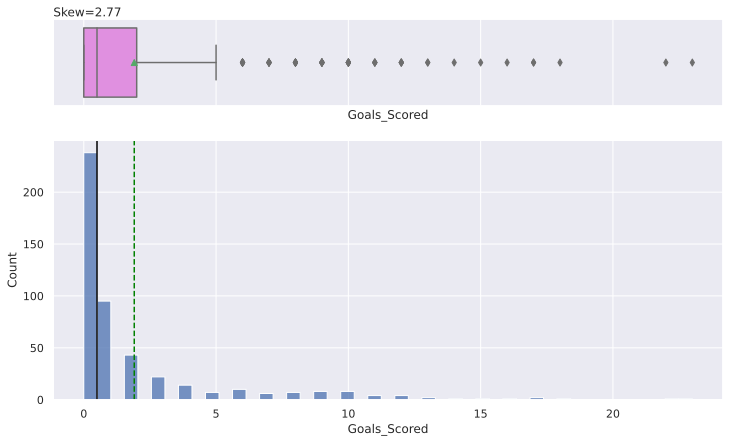

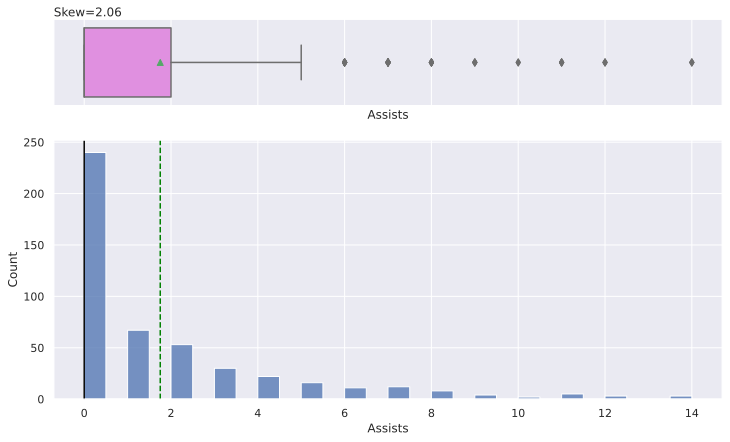

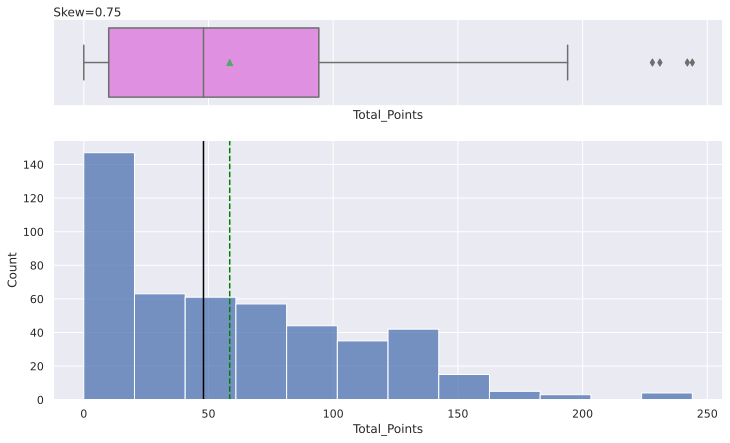

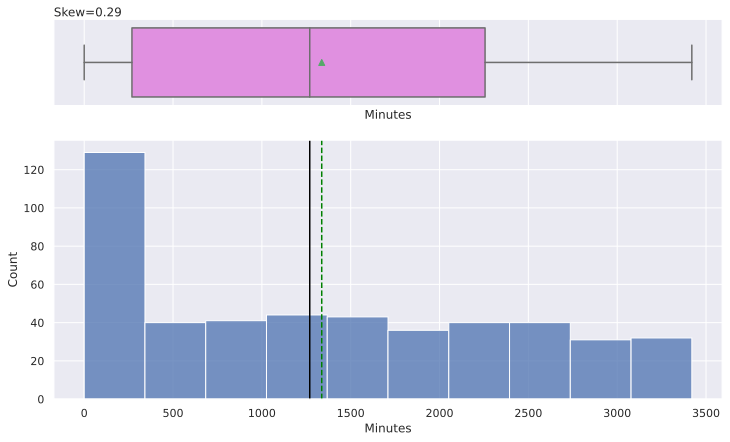

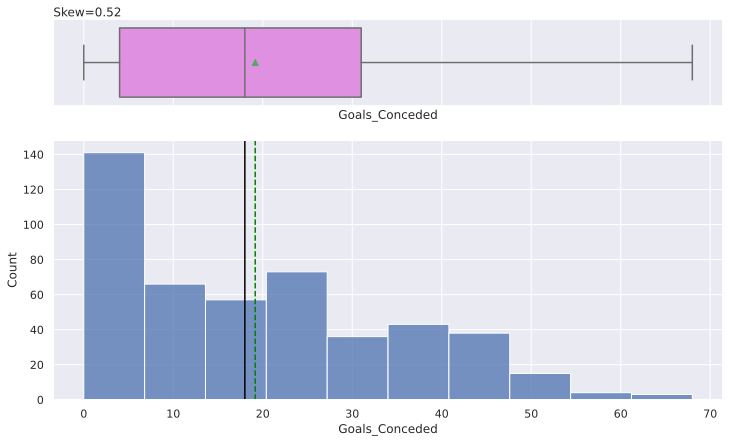

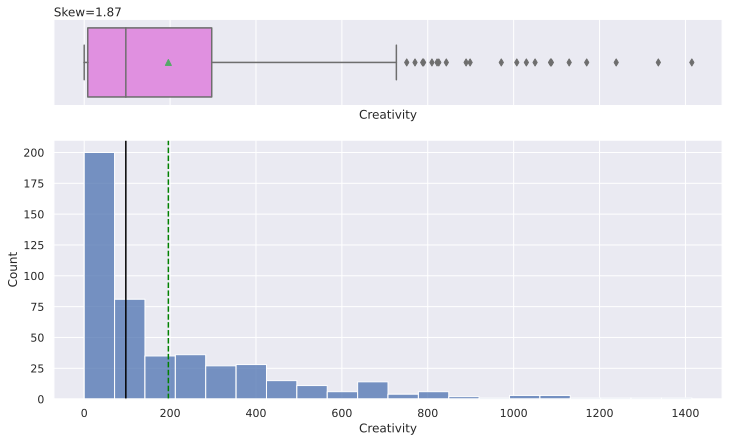

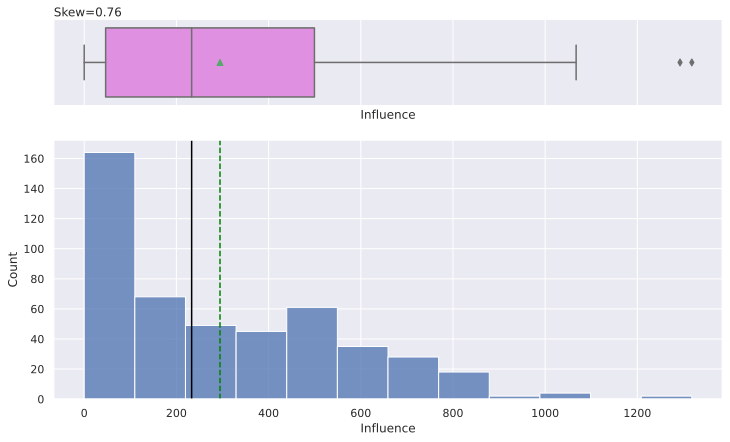

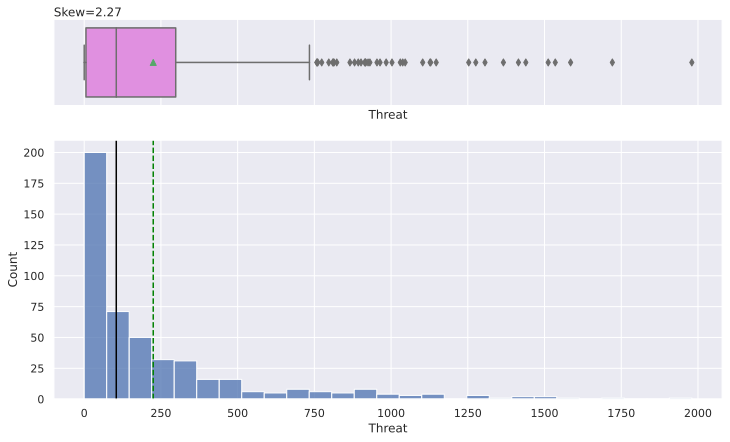

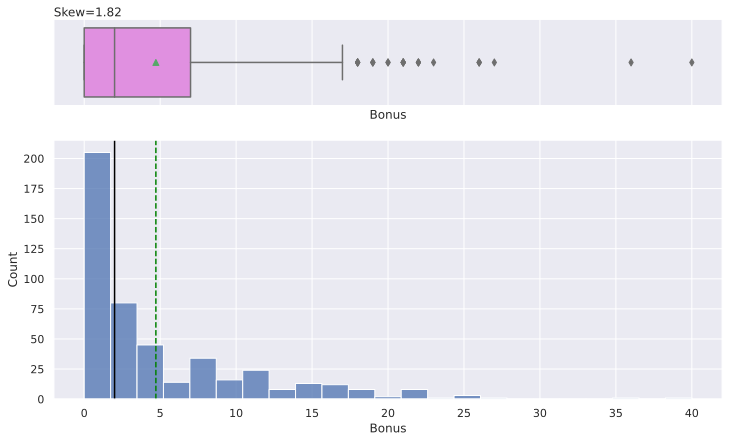

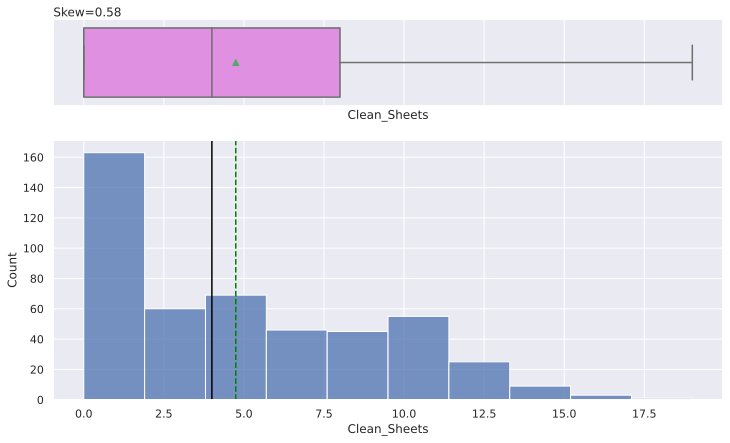

In [ ]:
# Let's plot boxplots and histograms for all the numeric columns
for col in num_cols:
  histogram_boxplot(df, col)

**Observations and Insights for all the plots:**

- All the plots are right skewed with a different degree of skewness
- There are some players who have performance much higher than average in Goals_Scored, Assists, Total_Points, Creativity, Influence, Threat and Bonus. This looks plausible as there always very few of extremely talented footballers, so we don't treat their scores as outliers.  

In [ ]:
# Let's create a function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique() # Unique values inside the feature
    if n is None:
        plt.figure(figsize = (count, 5))
    else:
        plt.figure(figsize = (n, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Set1")

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total
                                        ) # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**`Club`**

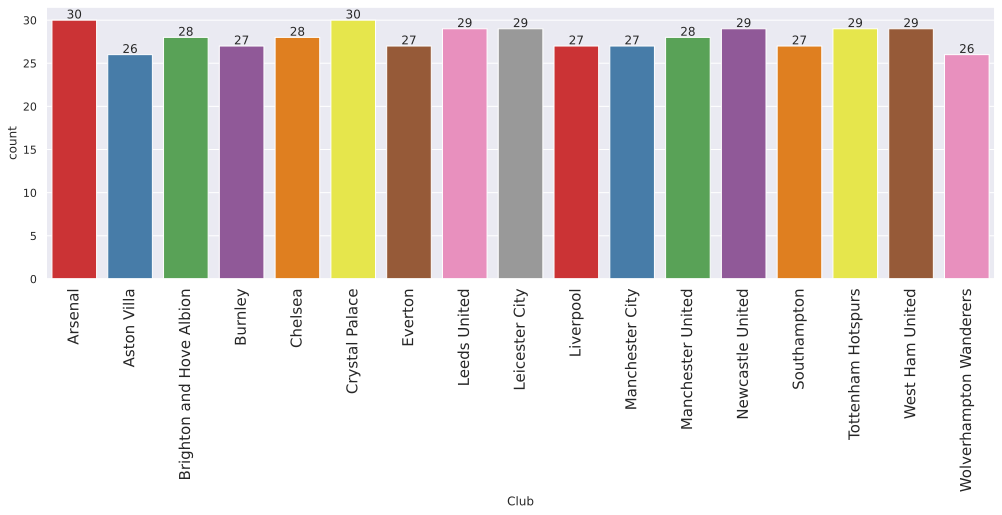

In [ ]:
labeled_barplot(df, 'Club')

**`Position`**

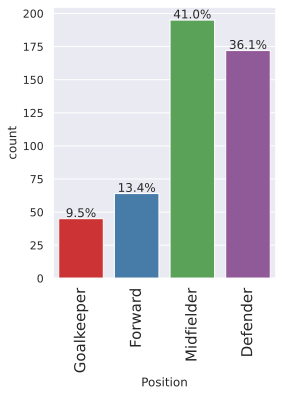

In [ ]:
labeled_barplot(df,'Position', perc=True)

In [ ]:
# Let's calculate mean number of players for all the Clubs
data.Club.value_counts().mean()

28.0

**Observations and Insights:**

- Number of players in each club is distriubuted almost uniformly. 
- Average number of players in a club is 28
- The most often players are either Defenders or Midfielders, with only 22.9% from the total being Forwards or Goalkeepers
- The interesting observation is that the number of Forwards is very close to the number of Goalkeepers, so most teams prefer to play from defence and mildfield than to focus more on attacking the contenders. This reflects the dominating style of the contempory game. 

### **Bivariate Analysis**

**Let's explore the data a bit more with bivariate analysis.**

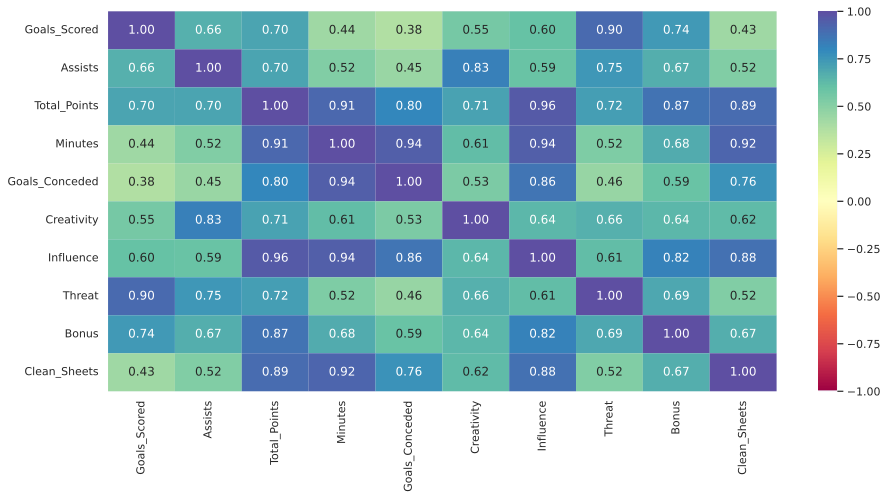

In [ ]:
# Correlation check
plt.figure(figsize = (15, 7))

sns.heatmap(
    df[num_cols].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Observations and Insights:**

- The dataset is highly correlated, correlation ranges from moderate to very strong. 
- The biggest correlation is between these variables: 
     1. Influence & Total_Points
     2. Minutes & Influence
     3. Goals_Scored & Threat
     4. Minutes & Goals_Conceded
     5. Total_Points & Minutes
     6. Minutes & Clean_Sheets
- All of these correlations make perfects sense
- Because the dataset is highly correlated we need to do PCA before we do clustering to get meaningful clusters


**Let's check players from which team have scored the most fantasy points on average.**

In [ ]:
# Let's create the order of clubs by mean Total_Points
tot_points_order=pd.pivot_table(df[['Club','Total_Points']],
                                values='Total_Points',index='Club',
                                aggfunc=np.mean).sort_values(by='Total_Points'
                                ,ascending=False)

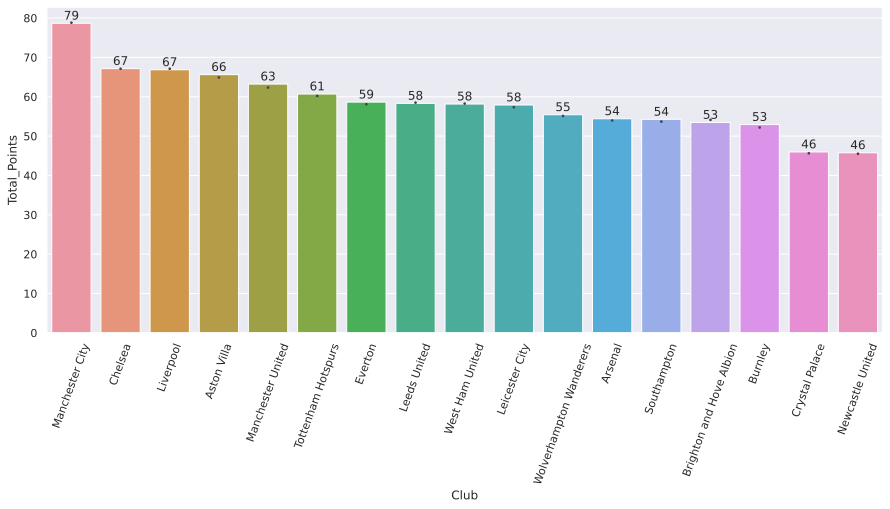

In [ ]:
# Let's plot the mean Total_Points for each Club

plt.figure(figsize = (15, 6))
ax=sns.barplot(data = df, x = 'Club' , y = 'Total_Points' , ci = False,
            order=tot_points_order.index)
plt.xticks(rotation = 70) 
for p in ax.patches:
  label = round(p.get_height())  # Count of each level of the category

  x = p.get_x() + p.get_width() / 2  # Width of the plot
  y = p.get_height()  # Height of the plot

  ax.annotate(
      label,
      (x, y),
      ha = "center",
      va = "center",
      size = 12,
      xytext = (0, 7),
      textcoords = "offset points",
  )  # Annotate 

plt.show()

We see that the biggest Fantasy Scores on average are achieved by players of Manchester City, Chelsea, Liverpool and Aston Villa. So these are the best teams to choose players from. 

**We know that players in different positions have specific roles to play in a team. Let's check players in which positions tend to score more fantasy points on average.**

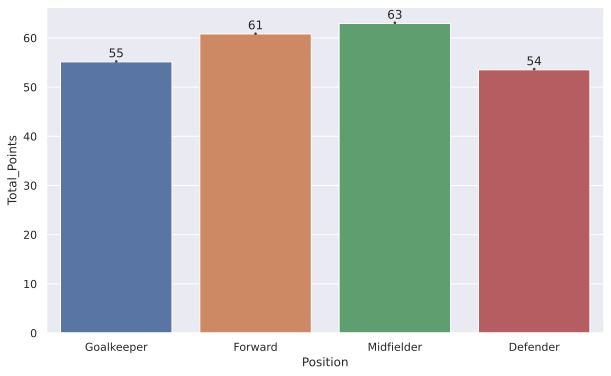

In [ ]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=df,x='Position',y='Total_Points',ci=False)
for p in ax.patches:
  label = round(p.get_height())  # Count of each level of the category

  x = p.get_x() + p.get_width() / 2  # Width of the plot
  y = p.get_height()  # Height of the plot

  ax.annotate(
      label,
      (x, y),
      ha = "center",
      va = "center",
      size = 12,
      xytext = (0, 8),
      textcoords = "offset points",
  )  # Annotate

plt.show()

We see that miedfielders and forwards tend to score the most of the Fantasy Points

**To effectively utilize their squad depth, managers often rotate the squad to keep key players in shape for tougher games. Let's check the total number of minutes played, on average, across different positions.**

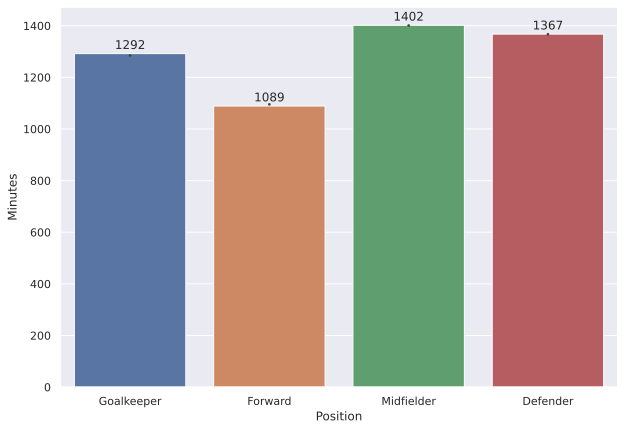

In [ ]:
plt.figure(figsize=(10,7))
ax=sns.barplot(data=df,x='Position',y='Minutes',ci=False)
for p in ax.patches:
  label = round(p.get_height())  # Count of each level of the category

  x = p.get_x() + p.get_width() / 2  # Width of the plot
  y = p.get_height()  # Height of the plot

  ax.annotate(
      label,
      (x, y),
      ha = "center",
      va = "center",
      size = 12,
      xytext = (0, 8),
      textcoords = "offset points",
  )  

plt.show()

- We see that Midfielders and Defenders tend to play more minutes on average than players at other positions and Forwards tend to play the least. Probably team coaches try to keep Forwards fresh to help them to score more goals. 
- An interesting observation that Goalkeepers are changed more frequently than Midfielders and Defenders   

**Every point counts in fantasy sports and getting bonus points for a player is always a treat. Let's check which team's players have secured the most bonus points, on average, last season.**

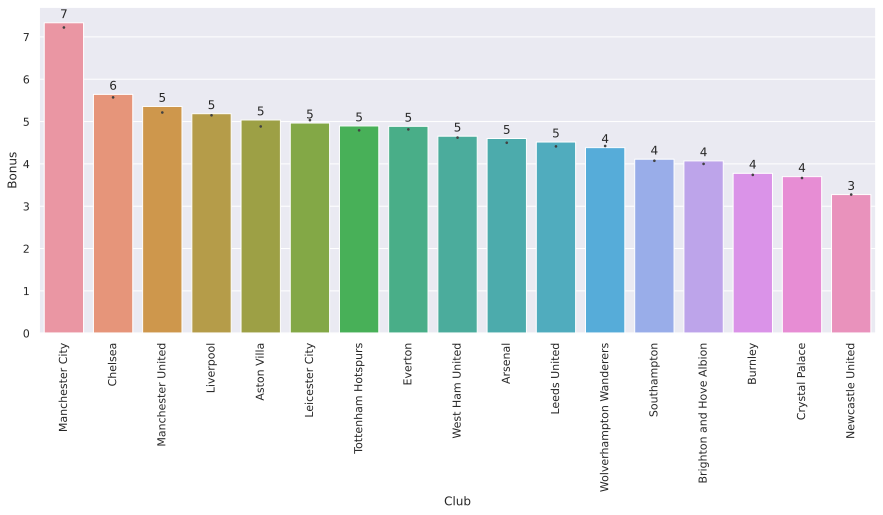

In [ ]:
bonus_order=pd.pivot_table(df[['Club','Bonus']],values='Bonus',index='Club',
                           aggfunc=np.mean).sort_values(by='Bonus',ascending=False)
plt.figure(figsize=(15,6))
ax=sns.barplot(data=df,x='Club',y='Bonus',order=bonus_order.index,ci=False)
plt.xticks(rotation=90)
for p in ax.patches:
  label = round(p.get_height())  # Count of each level of the category

  x = p.get_x() + p.get_width() / 2  # Width of the plot
  y = p.get_height()  # Height of the plot

  ax.annotate(
      label,
      (x, y),
      ha = "center",
      va = "center",
      size = 12,
      xytext = (0, 8),
      textcoords = "offset points",
  ) 

plt.show()

We see that Manchester City scores significantly more Bonus points than other Clubs. Again players from the Manchester City tend to be the most valuable. 

**Let's see which players scored the most fantasy points last season for each playing position.**

In [ ]:
pos_list = df.Position.unique().tolist()
best_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best_df = best_df.append(
        df_aux[df_aux.Total_Points == 
               df_aux.Total_Points.max()][['Player_Name', 'Club', 
                                           'Position', 'Total_Points']])

best_df

,Player_Name,Club,Position,Total_Points
36,Emiliano Martinez,Aston Villa,Goalkeeper,186
403,Harry Kane,Tottenham Hotspurs,Forward,242
315,Bruno Fernandes,Manchester United,Midfielder,244
223,Stuart Dallas,Leeds United,Defender,171


**Let's see the top 10 players with the most fantasy points last season for different positions of play.**

In [ ]:
best10_df = pd.DataFrame()

for pos in pos_list:
    df_aux = df[df.Position == pos]
    best10_df = best10_df.append(
        df_aux.sort_values('Total_Points', ascending = False).reset_index(drop = True).loc[:10, ['Player_Name', 'Club', 'Position', 'Total_Points']])

best10_df

,Player_Name,Club,Position,Total_Points
0,Emiliano Martinez,Aston Villa,Goalkeeper,186
1,Ederson Moares,Manchester City,Goalkeeper,160
2,Illan Meslier,Leeds United,Goalkeeper,154
3,Hugo Lloris,Tottenham Hotspurs,Goalkeeper,149
4,Nick Pope,Burnley,Goalkeeper,144
5,Alisson Becker,Liverpool,Goalkeeper,140
6,Edouard Mendy,Chelsea,Goalkeeper,140
7,Lukasz Fabianski,West Ham United,Goalkeeper,133
8,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,132
9,Bernd Leno,Arsenal,Goalkeeper,131


### **Scaling**

- Let's scale the data before we proceed with clustering.

In [ ]:
scaler = StandardScaler() 
subset =df[num_cols].copy()

subset_scaled = scaler.fit_transform(subset) 

In [ ]:
# Creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns = subset.columns)

### **Applying PCA**


In [ ]:
# Let's import PCA library
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = subset.shape[1]    # Storing the number of variables in the subset data

pca = PCA(n_components=n,random_state=1)                                     
data_pca = pd.DataFrame(pca.fit_transform(subset_scaled_df))              
# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_    
exp_var_df=pd.DataFrame(exp_var,columns=['Variance Explained'])  
exp_var_df        

,Variance Explained
0,0.721489
1,0.136593
2,0.058800
3,0.031384
4,0.022745
5,0.015227
6,0.007008
7,0.003937
8,0.001945
9,0.000870


## **K-Means Clustering**

In [ ]:
k_means_df = data_pca.copy()

Number of Clusters: 1 	Distortion: 9.999999999999995
Number of Clusters: 2 	Distortion: 4.918834080740253
Number of Clusters: 3 	Distortion: 3.3288766543752675
Number of Clusters: 4 	Distortion: 2.763585220414278
Number of Clusters: 5 	Distortion: 2.3527912561390747
Number of Clusters: 6 	Distortion: 2.065824774835345
Number of Clusters: 7 	Distortion: 1.8837543962770709
Number of Clusters: 8 	Distortion: 1.7411495270833983
Number of Clusters: 9 	Distortion: 1.6136738027815267
Number of Clusters: 10 	Distortion: 1.5258638788786174
Number of Clusters: 11 	Distortion: 1.4586516786947397
Number of Clusters: 12 	Distortion: 1.4042379783971493
Number of Clusters: 13 	Distortion: 1.3410329182963596
Number of Clusters: 14 	Distortion: 1.2931097415295174


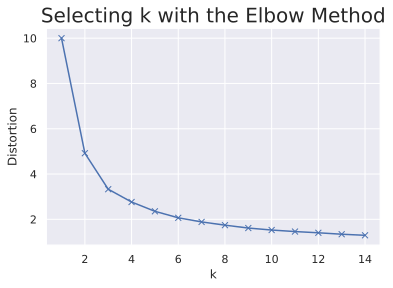

In [ ]:
# Let's plot elbow graph to determine what number of the clusters is optimal
clusters = range(1, 15)
Distortions = [] # We will use distortion as a metric

for k in clusters:
    
    model = KMeans(n_clusters = k, random_state = 1)
    
    model.fit(data_pca)
    
    prediction = model.predict(k_means_df)
    
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "sqeuclidean"), axis = 1))
        /k_means_df.shape[0]
    )

    Distortions.append(distortion)

    print("Number of Clusters:", k, "\tDistortion:", distortion)

plt.plot(clusters, Distortions, "bx-")

plt.xlabel("k")

plt.ylabel("Distortion")

plt.title("Selecting k with the Elbow Method", fontsize = 20)

plt.show()

We will move ahead with k = 4, as after it distortion drop slows down. 

In [ ]:
kmeans = KMeans(4, random_state = 1)

kmeans.fit(k_means_df)

KMeans(n_clusters=4, random_state=1)

In [ ]:
# Creating a copy of the original data
df1 = df.copy()

# Adding K-Means cluster labels to the K-Means dataframe
k_means_df["KM_segments"] = kmeans.labels_

# Adding K-Means cluster labels to the original dataframe
df1["KM_segments"] = kmeans.labels_

In [ ]:
df1['KM_segments'].value_counts(sort=False)

3    188
2     61
1     99
0    128
Name: KM_segments, dtype: int64

### **Cluster Profiling**

In [ ]:
km_cluster_profile = df1.groupby('KM_segments').mean()
km_cluster_profile['Count in each cluster']=df1['KM_segments'].value_counts()
km_cluster_profile.style.highlight_max(color='lightgreen',axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count in each cluster
KM_segments,,,,,,,,,,,
0,1.460938,1.601562,55.648438,1389.453125,20.554688,187.653125,270.037500,218.117188,3.312500,4.687500,128
1,1.363636,1.878788,103.525253,2670.555556,37.525253,265.671717,579.185859,199.636364,7.676768,10.020202,99
2,9.147541,6.639344,141.557377,2446.704918,33.344262,617.495082,659.324590,880.540984,16.147541,9.213115,61
3,0.148936,0.202128,9.824468,238.750000,3.930851,28.171809,43.164894,30.244681,0.409574,0.558511,188


In [ ]:
# Let's see the names of the players in each cluster
for cl in sorted(df1["KM_segments"].unique()):
    print("In cluster {}, the following players are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Player_Name"].unique())
    print()

In cluster 0, the following players are present:
['Calum Chambers' 'Daniel Ceballos' 'David Luiz' 'Emile Smith Rowe'
 'Gabriel Maghalaes' 'Martin Odegaard' 'Mohamed Naser El Sayed Elneny'
 'Thomas Partey' 'Willian Borges Da Silva' 'Mahmoud Ahmed Ibrahim Hassan'
 'Ross Barkley' 'Aaron Connolly' 'Adam Lallana' 'Alexis Mac Allister'
 'Dan Burn' 'Danny Welbeck' 'Mathew Ryan' 'Solomon March' 'Steven Alzate'
 'Tariq Lamptey' 'Ashley Barnes' 'Erik Pieters' 'Jack Cork'
 'Jay Rodriguez' 'Jeff Hendrick' 'Johann Berg Gudmundsson' 'Matej Vydra'
 'Robbie Brady' 'Andreas Christensen' 'Antonio Rudiger'
 'Callum Hudson-Odoi' 'Christian Pulisic' 'Hakim Ziyech' 'Kai Havertz'
 'Marcos Alonso' 'Mateo Kovacic' "N'Golo Kante" 'Olivier Giroud'
 'Tammy Abraham' 'Gary Cahill' 'Jairo Riedewald' 'James McArthur'
 'Jeffrey Schlupp' 'Jordan Ayew' 'Michy Batshuayi' 'Nathaniel Clyne'
 'Patrick van Aanholt' 'Scott Dann' 'Tyrick Mitchell' 'Alex Iwobi'
 'Allan Marques Loureiro' 'Andre Tavares Gomes' 'Seamus Coleman'
 '

In [ ]:
# Let's count how players are distributed by their positions inside the segments
df1.groupby(["KM_segments", "Position"])['Player_Name'].count()

KM_segments  Position  
0            Defender      47
             Forward       16
             Goalkeeper     3
             Midfielder    62
1            Defender      50
             Goalkeeper    17
             Midfielder    32
2            Defender       5
             Forward       20
             Midfielder    36
3            Defender      70
             Forward       28
             Goalkeeper    25
             Midfielder    65
Name: Player_Name, dtype: int64

We see that:

- there is no Forwards in the cluster 1, so it consists mostly of players with defensive role inside their teams
- There is no Goalkeeprs in the cluster 2, so it tends to representive the players with a more offensive role  

**Let's plot the boxplot**

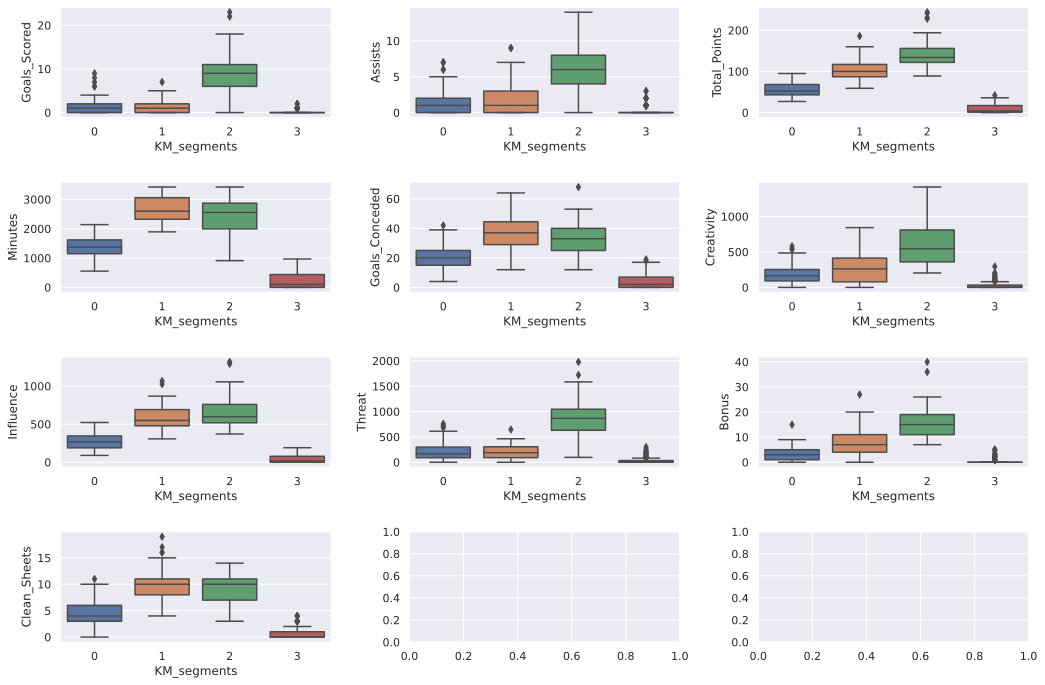

In [ ]:
fig, axes = plt.subplots(4, 3, figsize = (15, 10))
counter = 0

for ii in range(4):
    for jj in range(3):
        if counter < 10:
            sns.boxplot(
                ax = axes[ii][jj],
                data = df1,
                y = df1.columns[3 + counter],
                x = "KM_segments",
            )
            counter = counter + 1

fig.tight_layout(pad = 2.0)

# **Characteristics of each cluster:**

##**Cluster 0:**##
- This cluster represents 128 Players (~27% from Total)
- Most of the Players in this cluster have

 **Low** amount of:
  *   Goals scored
  *   Assists
  *   Threat
  *   Bonus

  **Moderate** amount of: 
  * Fantasy Scores
  * Minutes Played
  * Goals Conceded
  * Creativity
  * Influence
  * Clean Sheet 

Footballers in this cluster are moderately performing players which pose low threat to contenders, but used moderately in matches, and have moderate results in the most aspects. This cluster looks like ordinary players.  

##**Cluster 1:**##
- This cluster represents 99 Players (~21% from Total)
- Most of the Players in this cluster have

 **Low** amount of:
  *   Goals scored
  *   Assists
  *   Threat

  **Moderate** amount of: 
  * Fantasy Scores
  * Creativity
  * Bonus
  
  **High** amount of: 
    * Minutes
    * Goals Conceded
    * Influence
    * Clean Sheets

Footballers in this cluster also pose little threat, but they earn Bonuses more often and have high Influence and Minutes, so this are core players.  

##**Cluster 2:**##
- This cluster represents 61 Players (~13% from Total)
- Most of the Players in this cluster have
  
  **High** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly consists of the top performers, though players from this cluster also have high amount of Goals Conceded, probably because they tend to risk and play in the most of the matches.

##**Cluster 3:**##
- This cluster represents 188 Players (~40% from the Total)
- Most of the Players in this cluster have
  
  **Low** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly represents bottom performers, though they also have low amount Goals Conceded which is logical taking amount low amount of Minutes played. These footballers are most likely  substitute players. 




**It looks logical to range clusters by price of their respective players in this order:**







*   cluster 3 - Lowest price, low expected performance
*   cluster 0 - Mid- price, Mid- expected performance
* cluster 1 - Mid+ price, Mid+ expected performance
* cluster 2 - Highest price, high expected performance



## **K-Medoids Clustering**

In [ ]:
kmed_df = data_pca.copy()

In [ ]:
kmed = KMedoids(n_clusters=4, random_state = 1) # Create K-Medoids with nclusters = 4
kmed.fit(kmed_df)

KMedoids(n_clusters=4, random_state=1)

In [ ]:
# Creating a copy of the original data
df2 = df.copy()

# Add K-Medoids cluster labels to K-Medoids data
kmed_df["KMed_segments"] = kmed.labels_

# Add K-Medoids cluster labels to original data
df2["KMed_segments"] = kmed.labels_

### **Cluster Profiling**

In [ ]:
kmed_cluster_profile=df2.groupby('KMed_segments').mean()
kmed_cluster_profile['Count in each cluster']=df2['KMed_segments'].value_counts()
kmed_cluster_profile.style.highlight_max(color='lightgreen',axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count in each cluster
KMed_segments,,,,,,,,,,,
0,7.512195,6.195122,133.243902,2452.243902,33.853659,602.902439,625.653659,745.402439,14.573171,9.231707,82
1,1.068966,1.091954,99.528736,2638.195402,36.632184,184.582759,575.818391,166.333333,6.988506,9.931034,87
2,1.338235,1.558824,51.073529,1270.051471,18.977941,180.458824,242.588235,203.102941,2.904412,4.205882,136
3,0.099415,0.111111,7.736842,193.187135,3.362573,18.979532,34.188304,22.608187,0.280702,0.385965,171


In [ ]:
# Let's print players in each cluster
for cl in sorted(df2["KMed_segments"].unique()):
  print("In cluster {}, the following players are present:".format(cl))
  print(df2[df2["KMed_segments"]==cl]["Player_Name"].unique())
  print()

In cluster 0, the following players are present:
['Alexandre Lacazette' 'Bukayo Saka' 'Hector Bellerin' 'Nicolas Pepe'
 'Pierre-Emerick Aubameyang' 'Anwar El Ghazi' 'Bertrand Traore'
 'Jack Grealish' 'John McGinn' 'Ollie Watkins' 'Danny Welbeck'
 'Leandro Trossard' 'Neal Maupay' 'Pascal Gross' 'Ashley Westwood'
 'Chris Wood' 'Dwight McNeil' 'Benjamin Chilwell'
 'Jorge Luiz Frello Filho' 'Mason Mount' 'Reece James' 'Timo Werner'
 'Andros Townsend' 'Christian Benteke' 'Eberechi Eze' 'Wilfried Zaha'
 'Dominic Calvert-Lewin' 'Gylfi Sigurdsson' 'James Rodriguez'
 'Lucas Digne' 'Richarlison de Andrade' 'Jack Harrison' 'Mateusz Klich'
 'Patrick Bamford' 'Raphael Dias Belloli' 'Rodrigo Moreno' 'Stuart Dallas'
 'Harvey Barnes' 'James Maddison' 'Jamie Vardy' 'Kelechi Iheanacho'
 'Youri Tielemans' 'Andrew Robertson' 'Mohamed Salah' 'Roberto Firmino'
 'Sadio Mane' 'Trent Alexander-Arnold' 'Bernardo Silva'
 'Gabriel Fernando de Jesus' 'Ilkay Gundogan' 'Joao Cancelo'
 'Kevin De Bruyne' 'Phil Foden' 

**Let's plot the boxplot**

In [ ]:
df2.groupby(['KMed_segments','Position'])['Player_Name'].count()

KMed_segments  Position  
0              Defender      12
               Forward       21
               Midfielder    49
1              Defender      49
               Goalkeeper    17
               Midfielder    21
2              Defender      50
               Forward       16
               Goalkeeper     3
               Midfielder    67
3              Defender      61
               Forward       27
               Goalkeeper    25
               Midfielder    58
Name: Player_Name, dtype: int64

# We see that:

- Clusters created by K_Medoid method are somewhat different
- Again there is  no Forwards in the cluster 1, so it consists mostly of players with defensive role inside their teams
- There is no Goalkeeprs in the cluster 0, so it tends to representive the players with a more offensive role  

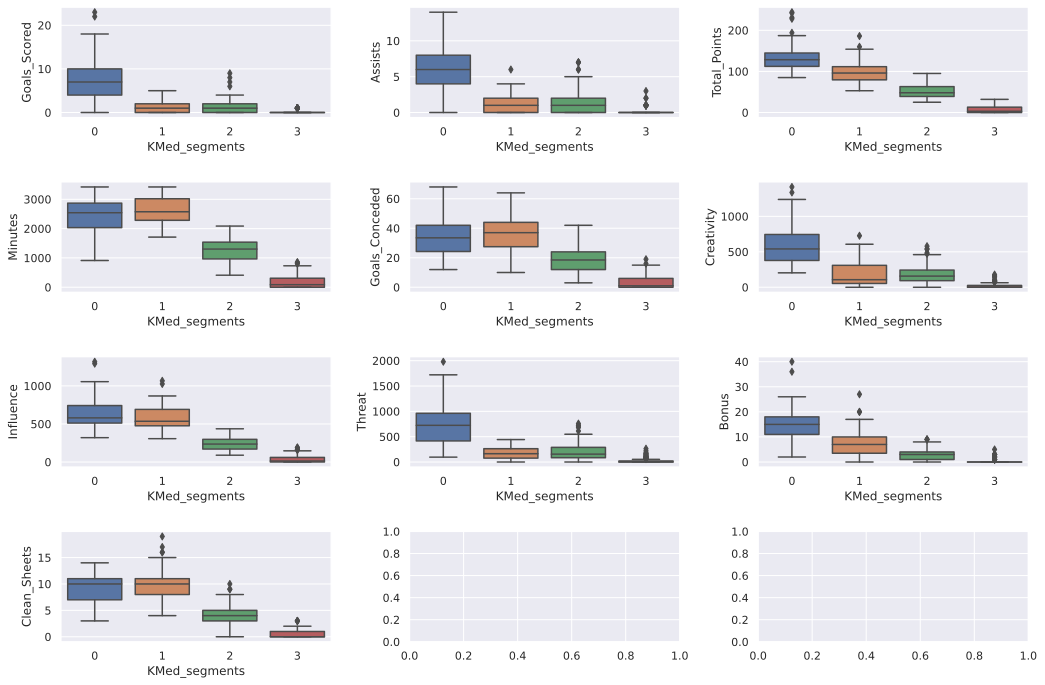

In [ ]:
# Let's create boxplots to analyze the clusters: 
fig, axes= plt.subplots(4,3,figsize=(15,10))
counter = 0 

for ii in range(4):
  for jj in range(3):
    if counter < 10:
      sns.boxplot(
          ax=axes[ii][jj],
          data=df2,
          y=df2.columns[3+counter],
          x= "KMed_segments",
      )
      counter = counter + 1
fig.tight_layout(pad=2)

# **Characteristics of each cluster:**

##**Cluster 0:**
- This cluster represents 82 Players (~17% from Total)
- Most of the Players in this cluster have
  
  **High** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly consists of the top performers, though players from this cluster also have high amount of Goals Conceded, probably because they tend to risk and play in the most of the matches.

##**Cluster 1:**
- This cluster represents 87 Players (~18% from Total)
- Most of the Players in this cluster have

  **Moderate** amount of: 
  * Goals Scored
  * Assists 
  * Fantasy Scores
  * Threat 
  * Creativity
  * Bonus
  
  **High** amount of: 
    * Minutes
    * Goals Conceded
    * Influence
    * Clean Sheets

Footballers in this cluster pose moderate threat, they earned Fantasy scores and Bonuses moderately, but they have high Influence and Minutes played, so this are the core players.  

##**Cluster 2:**
- This cluster represents 136 Players (~29% from Total)
- Most of the Players in this cluster have

  **Moderate** amount of: 
  * Goals scored
  * Assists
  * Fantasy Scores
  * Minutes played
  * Goals Conceded
  * Creativity
  * Influence
  * Threat
  * Bonus
  * Clean Sheets   

Footballers in this cluster are moderately performing players in all aspects. This cluster looks like ordinary players.  

##**Cluster 3:**
- This cluster represents 171 Players (~36% from the Total)
- Most of the Players in this cluster have
  
  **Low** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly represents bottom performers, though they also have low amount Goals Conceded which is logical taking amount low amount of Minutes played. These footballers are most likely  substitute players. 

### **Comparison of cluster profiles from K-Means and K-Medoids:**

- We see that using K-Medoids we got more evenly distributed clusters with better separation. This is due to the fact that K-Medoids are less susceptible to outliers in data. 
- The general role of the players in each cluster remained the same, but the order has changed.
- The names of the clusters predicted by K-Medoids are organized in hierarchical order from the top to the bottom players.  

##  **Hierarchical Clustering**

In [ ]:
hc_df = data_pca.copy()

In [ ]:
# List of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# List of linkage methods
linkage_methods = ["single", "complete", "average","weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric = dm, method = lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.8430175514228707.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7412041292261758.
Cophenetic correlation for Euclidean distance and average linkage is 0.8476499945585418.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8624581351067481.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8381223141111799.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8028394390632131.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8167064931302253.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8448497876639636.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.8065008904132246.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6583135946489013.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7747800632434058.
Cophenetic co

**Let's view the dendrograms for the different linkage methods with Euclidean distance only.**

In [ ]:
# List of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# To create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize = (15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric = "euclidean", method = method)

    dendrogram(Z, ax = axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [ ]:
# Create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns = compare_cols)
df_cc = df_cc.sort_values(by = "Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.577774
1,complete,0.741204
3,centroid,0.806830
0,single,0.843018
2,average,0.847650
5,weighted,0.862458


We proceed with  4 clusters, Euclidean metric and weighted linkage, but will use for this purpose scipy library, because sklearn doesn't support weighted linkage. 

In [ ]:
Z = linkage(hc_df, metric = "euclidean", method = 'weighted')
HClusters = fcluster(Z, t= 4 , criterion = 'maxclust') 

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HClusters
df3["HC_segments"] = HClusters

### **Cluster Profiling**

In [ ]:
hc_cluster_profile=df3.groupby('HC_segments').mean()
hc_cluster_profile['Count in each cluster']=df3['HC_segments'].value_counts()
hc_cluster_profile.style.highlight_max(color='lightgreen',axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count in each cluster
HC_segments,,,,,,,,,,,
1,17.750000,10.625000,207.375000,3058.625000,41.375000,699.450000,995.825000,1480.250000,26.375000,11.500000,8
2,7.333333,6.800000,136.577778,2524.155556,34.244444,659.733333,632.431111,795.288889,14.977778,9.666667,45
3,0.000000,0.000000,161.333333,3150.000000,45.000000,16.666667,979.933333,0.666667,22.333333,12.333333,3
4,1.038095,1.054762,46.583333,1163.959524,16.933333,137.978571,240.171905,141.547619,3.080952,4.035714,420


In [ ]:
# Let's print players in each cluster
for cl in sorted(df3["HC_segments"].unique()):
  print('In cluster {}, the following players are present:'.format(cl))
  print(df3[df3["HC_segments"]==cl]['Player_Name'].unique())
  print()

In cluster 1, the following players are present:
['Ollie Watkins' 'Dominic Calvert-Lewin' 'Patrick Bamford' 'Jamie Vardy'
 'Mohamed Salah' 'Bruno Fernandes' 'Harry Kane' 'Heung-Min Son']

In cluster 2, the following players are present:
['Alexandre Lacazette' 'Bukayo Saka' 'Pierre-Emerick Aubameyang'
 'Bertrand Traore' 'Jack Grealish' 'Leandro Trossard' 'Neal Maupay'
 'Pascal Gross' 'Chris Wood' 'Mason Mount' 'Timo Werner' 'Eberechi Eze'
 'Wilfried Zaha' 'Gylfi Sigurdsson' 'Lucas Digne' 'Richarlison de Andrade'
 'Jack Harrison' 'Raphael Dias Belloli' 'Stuart Dallas' 'Harvey Barnes'
 'James Maddison' 'Kelechi Iheanacho' 'Andrew Robertson' 'Roberto Firmino'
 'Sadio Mane' 'Trent Alexander-Arnold' 'Gabriel Fernando de Jesus'
 'Ilkay Gundogan' 'Kevin De Bruyne' 'Phil Foden' 'Raheem Sterling'
 'Riyad Mahrez' 'Luke Shaw' 'Marcus Rashford' 'Callum Wilson' 'Che Adams'
 'Danny Ings' 'James Ward-Prowse' 'Aaron Cresswell' 'Jarrod Bowen'
 'Michail Antonio' 'Pablo Fornals' 'Tomas Soucek' 'Vladimir C

**We see that most of the players have been grouped into one cluster, and there are two very sparse clusters. This clustering does not look good as the clusters do not have enough variability.**

**Let's try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 4 appears to be a good number of clusters from the dendrogram for Ward linkage.**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters = 4 , affinity ='euclidean', linkage = 'ward' ) 
HCmodel.fit(hc_df)

AgglomerativeClustering(n_clusters=4)

In [ ]:
# Creating a copy of the original data
df3 = df.copy()

# Adding hierarchical cluster labels to the Heirarhical and original dataframes
hc_df["HC_segments"] = HCmodel.labels_
df3["HC_segments"] = HCmodel.labels_

### **Cluster Profiling**

In [ ]:
HC_cluster_profile=df3.groupby('HC_segments').mean()
HC_cluster_profile['Count in each cluster']=df3['HC_segments'].value_counts()
HC_cluster_profile.style.highlight_max(color='Lightgreen',axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count in each cluster
HC_segments,,,,,,,,,,,
0,8.905660,7.377358,147.264151,2604.830189,35.320755,665.728302,687.283019,898.679245,16.698113,9.943396,53
1,1.440367,1.660550,100.477064,2586.458716,35.844037,259.253211,561.592661,200.045872,7.339450,9.834862,109
2,2.024390,1.739837,57.926829,1372.813008,20.796748,193.628455,276.421138,258.268293,3.845528,4.455285,123
3,0.157068,0.251309,10.324607,248.863874,4.094241,31.026702,45.018848,30.785340,0.460733,0.586387,191


In [ ]:
for cl in sorted(df3['HC_segments'].unique()):
  print('In cluster {}, the following players are present:'.format(cl))
  print(df3[df3['HC_segments']==cl]['Player_Name'].unique())
  print()  

In cluster 0, the following players are present:
['Alexandre Lacazette' 'Bukayo Saka' 'Pierre-Emerick Aubameyang'
 'Bertrand Traore' 'Jack Grealish' 'Ollie Watkins' 'Leandro Trossard'
 'Neal Maupay' 'Pascal Gross' 'Chris Wood' 'Mason Mount' 'Timo Werner'
 'Eberechi Eze' 'Wilfried Zaha' 'Dominic Calvert-Lewin' 'Gylfi Sigurdsson'
 'Lucas Digne' 'Richarlison de Andrade' 'Jack Harrison' 'Patrick Bamford'
 'Raphael Dias Belloli' 'Stuart Dallas' 'Harvey Barnes' 'James Maddison'
 'Jamie Vardy' 'Kelechi Iheanacho' 'Andrew Robertson' 'Mohamed Salah'
 'Roberto Firmino' 'Sadio Mane' 'Trent Alexander-Arnold'
 'Gabriel Fernando de Jesus' 'Ilkay Gundogan' 'Kevin De Bruyne'
 'Phil Foden' 'Raheem Sterling' 'Riyad Mahrez' 'Bruno Fernandes'
 'Luke Shaw' 'Marcus Rashford' 'Callum Wilson' 'Che Adams' 'Danny Ings'
 'James Ward-Prowse' 'Harry Kane' 'Heung-Min Son' 'Aaron Cresswell'
 'Jarrod Bowen' 'Michail Antonio' 'Pablo Fornals' 'Tomas Soucek'
 'Vladimir Coufal' 'Pedro Lomba Neto']

In cluster 1, the foll

**Let's plot the boxplot**

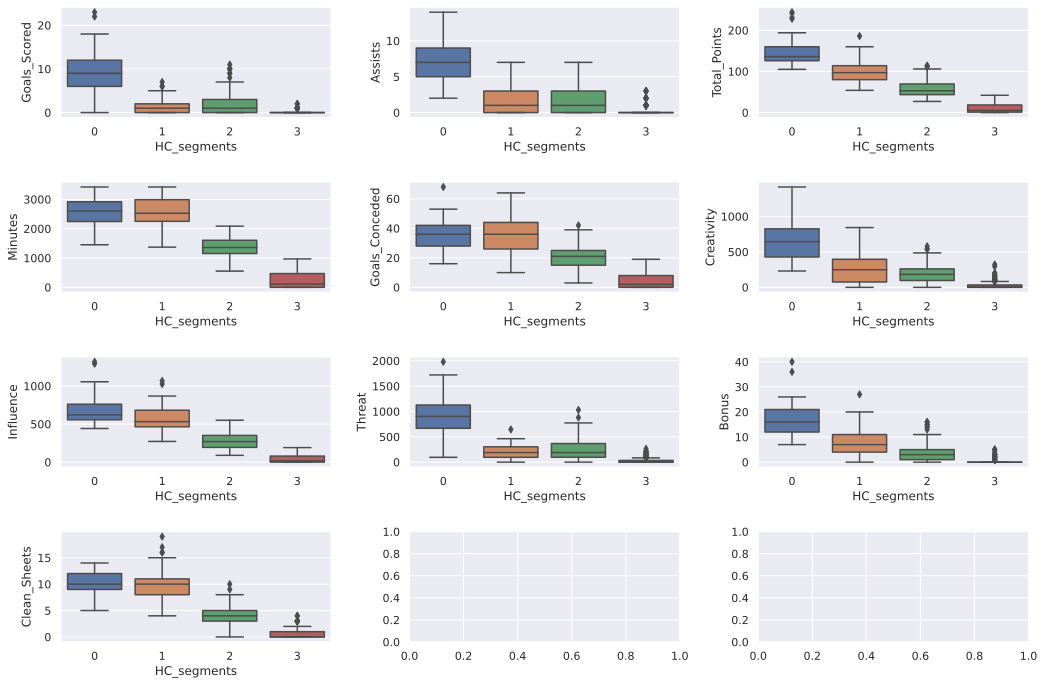

In [ ]:
# Let's create boxplots to analyze the clusters:
fig,axes= plt.subplots(4,3,figsize=(15,10))
counter = 0

for ii in range(4):
  for jj in range(3):
    if counter < 10:
      sns.boxplot(
          ax=axes[ii][jj],
          data=df3,
          y=df3.columns[3+counter],
          x="HC_segments"
      )
      counter +=1
fig.tight_layout(pad=2)

# **Characteristics of each cluster:**

##**Cluster 0:**
- This cluster represents 53 Players (~11% from Total)
- Most of the Players in this cluster have
  
  **High** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly consists of the top performers, though players from this cluster also have high amount of Goals Conceded, probably because they tend to risk and play in the most of the matches.

##**Cluster 1:**
- This cluster represents 109 Players (23~% from Total)
- Most of the Players in this cluster have

  **Moderate** amount of: 
  * Goals Scored
  * Assists 
  * Fantasy Scores
  * Threat 
  * Creativity
  * Bonus
  
  **High** amount of: 
    * Minutes
    * Goals Conceded
    * Influence
    * Clean Sheets

Footballers in this cluster pose moderate threat, they earned Fantasy scores and Bonuses moderately, but they have high Influence and Minutes played, so this are the core players.  

##**Cluster 2:**
- This cluster represents 123 Players (26~% from Total)
- Most of the Players in this cluster have

  **Moderate** amount of: 
  * Goals scored
  * Assists
  * Fantasy Scores
  * Minutes played
  * Goals Conceded
  * Creativity
  * Influence
  * Threat
  * Bonus
  * Clean Sheets   

Footballers in this cluster are moderately performing players in all aspects. This cluster looks like ordinary players.  

##**Cluster 3:**
- This cluster represents 191 Players (~40% from the Total)
- Most of the Players in this cluster have
  
  **Low** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly represents bottom performers, though they also have low amount Goals Conceded which is logical taking amount low amount of Minutes played. These footballers are most likely  substitute players. 

### **Comparison of cluster profiles from Hierarchical and previous algorithms:**

* The clusters distributed by the same roles as in previous algorithms
* At the same time players are distributed by clusters in less even way compared to the KMedoids and in a very close way to the KMeans


## **GMM clustering**

In [ ]:
gmm_df = data_pca.copy()

In [ ]:
gmm = GaussianMixture(n_components=4, random_state = 1) # Initializing the Gaussian Mixture algorithm

gmm.fit(gmm_df) # Fitting the Gaussian Mixture algorithm on the gmm_df

GaussianMixture(n_components=4, random_state=1)

### **Cluster Profiling**

In [ ]:
# Creating a copy of the original data
df4 = df.copy()

# Adding gmm cluster labels to the GMM and original dataframes
df4["GMM_segments"] = gmm.predict(gmm_df)
gmm_df["GMM_segments"] = gmm.predict(gmm_df)

In [ ]:
gmm_cluster_profiles=df4.groupby(df4['GMM_segments']).mean()
gmm_cluster_profiles['Count in each segment']=df4['GMM_segments'].value_counts()
gmm_cluster_profiles.style.highlight_max(color='Lightgreen',axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Count in each segment
GMM_segments,,,,,,,,,,,
0,1.189655,1.344828,94.439655,2453.189655,33.793103,221.881897,535.862069,174.991379,6.793103,9.431034,116
1,0.000000,0.000000,3.547619,107.436508,2.055556,8.590476,15.739683,5.746032,0.000000,0.182540,126
2,6.552381,5.390476,114.876190,2104.809524,29.619048,501.710476,521.451429,683.466667,11.904762,7.685714,105
3,0.635659,0.868217,34.031008,908.968992,14.186047,106.855039,165.444961,110.813953,1.612403,2.596899,129


In [ ]:
# Let's print the players in each cluster
for cl in sorted(df4['GMM_segments'].unique()):
  print(f'In cluster {cl}, the following players are present:')
  print(df4[df4['GMM_segments']==cl]['Player_Name'].unique())
  print()

In cluster 0, the following players are present:
['Bernd Leno' 'Daniel Ceballos' 'Emile Smith Rowe' 'Gabriel Maghalaes'
 'Granit Xhaka' 'Kieran Tierney' 'Rob Holding'
 'Douglas Luiz Soares de Paulo' 'Emiliano Martinez' 'Ezri Konsa Ngoyo'
 'John McGinn' 'Matt Targett' 'Matthew Cash' 'Tyrone Mings' 'Adam Webster'
 'Ben White' 'Joel Veltman' 'Lewis Dunk' 'Robert Sanchez' 'Solomon March'
 'Yves Bissouma' 'Ashley Westwood' 'Ben Mee' 'Charlie Taylor'
 'Dwight McNeil' 'James Tarkowski' 'Josh Brownhill' 'Matthew Lowton'
 'Nick Pope' 'Andreas Christensen' 'Antonio Rudiger' 'Benjamin Chilwell'
 'Cesar Azpilicueta' 'Edouard Mendy' 'Hakim Ziyech' 'Kurt Zouma'
 'Mateo Kovacic' "N'Golo Kante" 'Thiago Silva' 'Cheikhou Kouyate'
 'Gary Cahill' 'Joel Ward' 'Luka Milivojevic' 'Vicente Guaita'
 'Abdoulaye Doucoure' 'Allan Marques Loureiro' 'Ben Godfrey'
 'Jordan Pickford' 'Mason Holgate' 'Michael Keane' 'Seamus Coleman'
 'Yerry Mina' 'Ezgjan Alioski' 'Illan Meslier' 'Kalvin Phillips'
 'Liam Cooper' 'Luke 

**Let's plot the boxplot**

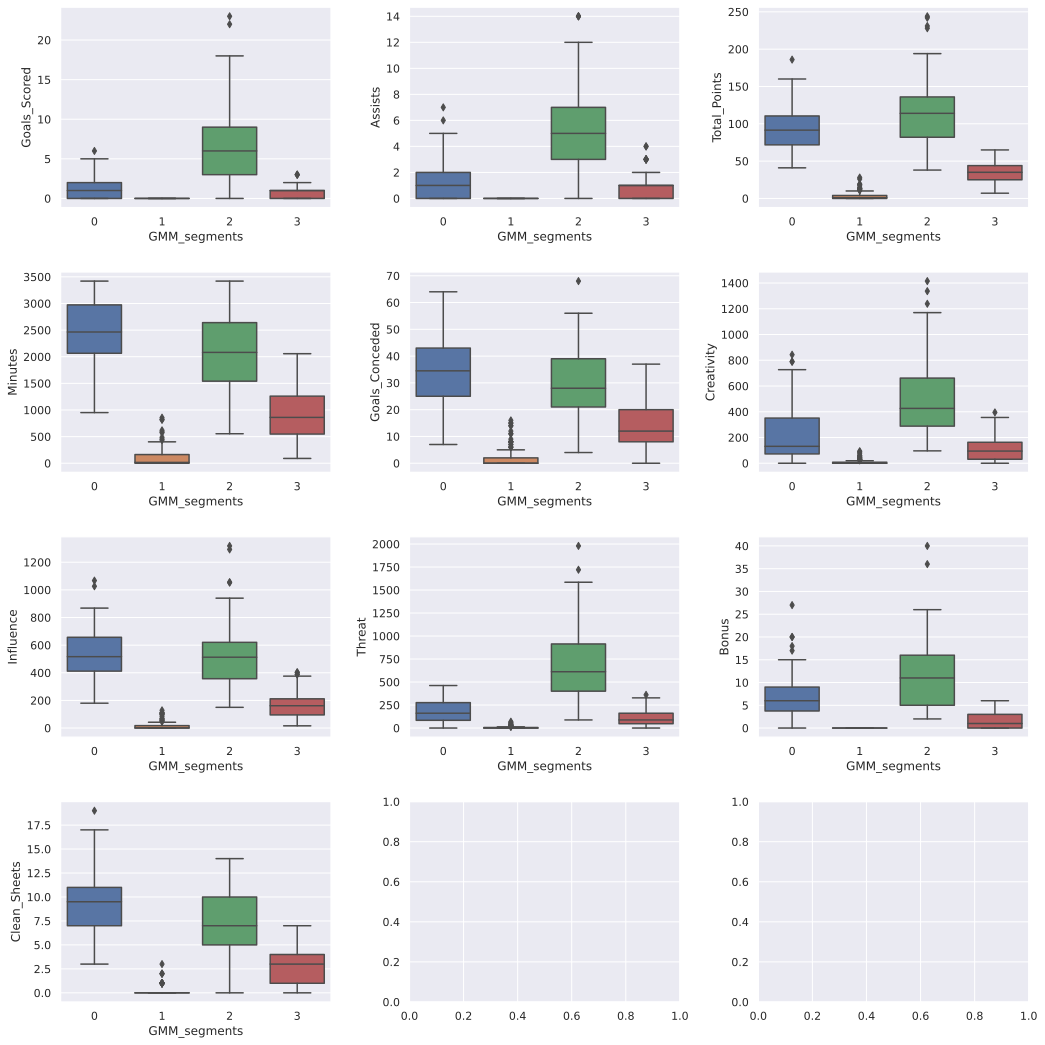

In [ ]:
# Let's create boxplots to analyze the clusters:
fig,axes = plt.subplots(4,3,figsize=(15,15))
counter = 0

for ii in range(4):
  for jj in range(3):
    if counter < 10:
      sns.boxplot(
          ax=axes[ii][jj],
          data=df4,
          y=df4.columns[3+counter],
          x="GMM_segments"
      )
      counter +=1
fig.tight_layout(pad=2)

# **Characteristics of each cluster:**

##**Cluster 0:**##
- This cluster represents 116 Players (~24% from Total)
- Most of the Players in this cluster have

 **Low** amount of:
  *   Goals scored
  *   Assists

  **Moderate** amount of: 
  
  * Creativity
  * Threat
  * Bonus
  
  **High** amount of:
    * Fantasy Scores 
    * Minutes
    * Goals Conceded
    * Influence
    * Clean Sheets

Footballers in this cluster also pose moderate threat and earned Bonuses moderately, but they have highest Influence and Minutes played. Again we can call such footballers core players.  

##**Cluster 1:**##
- This cluster represents 126 Players (~27% from Total)
- Most of the Players in this cluster have
  
  **Low** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly represents bottom performers, though they also have low amount Goals Conceded which is logical taking amount low amount of Minutes played. These footballers are most likely  substitute players. 

##**Cluster 2:**##
- This cluster represents 105 Players (~22% from Total)
- Most of the Players in this cluster have
  
  **High** amount of: 
    * Goals scored
    * Assists
    * Fantasy Scores
    * Minutes
    * Goals Conceded
    * Creativity
    * Influence
    * Threat
    * Bonus
    * Clean Sheets

This cluster clearly consists of the top performers, though players from this cluster also have high amount of Goals Conceded, probably because they tend to risk and play in the most of the matches.

##**Cluster 3:**##
- This cluster represents 129 Players (~27% from the Total)
- Most of the Players in this cluster have

 **Low** amount of:
  * Goals scored
  * Assists
  * Creativity
  * Threat
  * Bonus

  **Moderate** amount of: 
  * Fantasy Scores
  * Minutes Played
  * Goals Conceded
  * Influence
  * Clean Sheet 

Footballers in this cluster are low/moderately performing players which pose low threat to contenders, but used moderately in matches, and have moderate Fantasy Scores. This cluster looks like ordinary players.  




### **Comparison of cluster profiles from GMM and previous algorithms:**

* GMM has very even split between the clusters
* Descriptions of the clusters in terms of low/moderate aspects are a bit different from other methods, but general roles still stay the same. 

## **DBSCAN**

In [ ]:
dbscan_df = data_pca.copy()

In [ ]:
# Let's choose min_sample_value first. We will use the rule of thumb that
# optimal values = 2 DIM of the data
min_sample_value=2*dbscan_df.shape[1]
min_sample_value

22

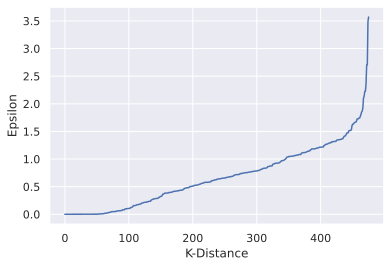

In [ ]:
# Let's use nearest neighbors to choose optimal value of epsilon
from sklearn.neighbors import NearestNeighbors
neighbors=NearestNeighbors(n_neighbors=min_sample_value)
neighbors_fit=neighbors.fit(dbscan_df)
distances,indices=neighbors_fit.kneighbors(dbscan_df)
distances=np.sort(distances,axis=0) 
distances=distances[:,1]
plt.plot(distances)
plt.xlabel('K-Distance')
plt.ylabel('Epsilon');

We choose optimal value of epsilon as 3.25

In [ ]:
# Applying DBSCAN with the hyperparmeter values that we got
db = DBSCAN(eps = 3.25, min_samples = 22).fit(dbscan_df)

In [ ]:
# Creating a copy of the original data
df5 = df.copy()

# Add DBSCAN cluster labels to dbscan data
dbscan_df["db_segments"] = db.labels_

# Add DBSCAN cluster labels to original data
df5["db_segments"] =  db.labels_

### **Cluster Profiling**

In [ ]:
dbs_cluster_profiles=df4.groupby(df5['db_segments']).mean()
dbs_cluster_profiles['Count in each segment']=df5['db_segments'].value_counts()
dbs_cluster_profiles.style.highlight_max(color='Lightgreen',axis=0)

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,GMM_segments,Count in each segment
db_segments,,,,,,,,,,,,
-1,18.666667,11.666667,221.000000,3045.000000,41.000000,779.533333,1067.566667,1447.000000,28.666667,11.166667,2.000000,6
0,1.693617,1.625532,56.442553,1315.104255,18.878723,188.526383,284.750213,209.361702,4.412766,4.663830,1.512766,470


**Observations and Insights:**

* Unfortunately DBSCAN doesn't work well on this dataset, as it gives only one cluster + several outliers

### **Choosing the Best Algorithm**

- Since cluster profiles are the same for every algorithm except DBSCAN, it is difficult to choose the best algorithm. We can compute the silhouette score to choose the best algorithm among all the algorithms.

In [ ]:
# KMeans
kmeans = KMeans(n_clusters = 4, random_state = 1)        # Initializing K-Means with number of clusters as 4 and random_state = 1

preds = kmeans.fit_predict((data_pca))                   # Fitting and predicting K-Means on data_pca

score = silhouette_score(data_pca, preds)                # Calculating the silhouette score

print(score)         

0.4041321364385185


In [ ]:
# K-Medoids
kmedoids=KMedoids(n_clusters = 4,random_state=1)
preds=kmedoids.fit_predict((data_pca))
score= silhouette_score(data_pca,preds)
print(score)

0.3938224996935729


In [ ]:
# Agglomerative Clustering with distance as Euclidean, linkage as ward with clusters = 4
HCmodel = AgglomerativeClustering(n_clusters = 4, affinity = "euclidean", linkage = "ward",) 
preds = HCmodel.fit_predict(data_pca)  
score = silhouette_score(data_pca, preds)
print(score)   

0.3849709986025467


In [ ]:
# Gaussian Mixture algorithm with number of clusters as 4 and random_state = 1
gmm = GaussianMixture(n_components=4, random_state=1)   
preds = gmm.fit_predict((data_pca))
score = silhouette_score(data_pca, preds)
print(score)

0.28494644297302135


- Based on the silhouette score, we can see that K-Means algorithm giving the best score on the data. We would proceed K-Means as the best algorithm. 


## **Recommendations:**

- Player performances from previous seasons should be taken into account and fantasy prices from the previous season should be referred to as a benchmark to determine the price for the upcoming season.

- **Cluster 2** players are the top players for the fantasy scores. They fetch the most points and have the highest chance of getting bonus points too. These players should be priced the highest so that it would be difficult to accommodate too many of them in the same team (because of the fixed budget) and fantasy managers have to make wise choices.

- **Cluster 3** has the players who are in the squad to provide backup in case any of the starting 11 players get injured. They get lowest game time and barely get any fantasy points. These players should be priced the lowest amongst the 4 clusters.

- **Cluster 0** Footballers in this cluster are moderately performing players which pose low threat to contenders, but used moderately in matches, and have moderate results in the most aspects. This cluster looks like ordinary players. They should be priced higher than players from cluster 3 but, lower than players from the other clusters. They could be good picks for fantasy managers to set up a team within their budget.

- **Cluster 1** Footballers in this cluster also pose little threat, but they earn Bonuses more often and have high Influence and Minutes, so this are core players. Which should be priced lower than footballers from cluster 2 but higher than players from the other clusters. They could be good differential picks for fantasy managers.

- OnSports should conduct cluster analysis separately for each of the playing positions to arrive at a better fantasy pricing strategy.